# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
import sys

if sys.platform == 'darwin':
    env = UnityEnvironment(file_name='Reacher.app')
else:
    env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(f'Using brain name: {brain_name}')

Using brain name: ReacherBrain


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Train

### Actor / Critic Network

**Actor Network:**

|Layer|Input|Non Linear Function|Output|
|-|-|-|-|
|Input Layer|33|Relu|400|
|Hidden Layer|400|Relu|300|
|Ouptut|300|Relu|4|


**Critic Network:**

|Layer|Input|Non Linear Function|Output|
|-|-|-|-|
|Input Layer|33|Relu|400|
|Hidden Layer|**400 + 4** (actions)|Relu|300|
|Ouptut|300|Relu|1|


In [5]:
import torch
import torch.nn as nn

class BaseNetwork(nn.Module):
    def __init__(self, device='cpu'):
        super().__init__()
        self.device = device

    def _initialize_layer_uniform(self, layer, init_w=3e-3):
        #nn.init.kaming_normal_(layer.weight.data, a=0, mode='fan_in')
        layer.weight.data.uniform_(-init_w, init_w)
        layer.bias.data.fill_(0)
        
    def _initialize_layer_orthognal(self, layer, scale=1e-3):
        nn.init.orthogonal_(layer.weight.data)
        layer.weight.data.mul_(scale)
        layer.bias.data.fill_(0)
        
    def _initialize_layer_kaiming(self, layer):
        nn.init.kaiming_normal_(layer.weight.data, a=0, mode='fan_in')
        layer.bias.data.fill_(0)
        
    def initialize_weights(self):
        self._initialize_layer_orthognal(self.fc_input)
        self._initialize_layer_orthognal(self.hidden)
        self._initialize_layer_uniform(self.fc_output, init_w=3e-3)

        
class ActorDDPGNetwork(BaseNetwork):
    def __init__(self, state_size, action_size, layer1=400, layer2=300, device = 'cpu'):
        super().__init__(device)
        
        self.fc_input = nn.Linear(state_size, layer1).float().to(device)
        self.hidden = nn.Linear(layer1, layer2).float().to(device)
        self.fc_output = nn.Linear(layer2, action_size).float().to(device)

    def forward(self, state):
        output = torch.relu(self.fc_input(state))
        output = torch.relu(self.hidden(output))
        output = self.fc_output(output)
        return torch.tanh(output)
        
class CriticDDPGNetwork(BaseNetwork):
    def __init__(self, state_size, action_size, layer1=400, layer2=300, device = 'cpu'):
        super().__init__(device)
        
        self.fc_input = nn.Linear(state_size, layer1).float().to(device)
        self.hidden = nn.Linear(layer1 + action_size, layer2).float().to(device)
        self.fc_output = nn.Linear(layer2, 1).float().to(device)

    def forward(self, state, action):
        output = torch.relu(self.fc_input(state))
        # second layer has the state + action coming into it
        state_action = torch.cat((output, action), dim=1)
        output = torch.relu(self.hidden(state_action))
        output = self.fc_output(output)
        return output

# Alogrithm Summary

1. Accumulate initial samples till replay buffer is full
2. Train every 10th step
3. Train critic:

a. Get next action from target actor    
b. Get next_state, next_action value from target critic    
c. Compute y = reward + gamma * value returned by target_critic    
d. Compute current_value = local_critic network (current_state, action taken in that state)    
e. Compute Mean Squared Error between y and current_value    
f. optimize critic    

4. Train actor:

a. Pass current state to local actor to get predicted action     
b. Pass current state, predicted action to local critic     
c. Define loss as -ve mean of local critic   
d. Optimize actor  

5. Soft update weights on target networks

In [6]:
import torch
import torch.nn as nn
from replay import ReplayBuffer, Experience
from noise import OUNoise
from collections import deque

class ActorCriticAgent:
    def __init__(self, actor, critic, device='cpu', bootstrap_len=5):
        self.bootstrap_len = bootstrap_len
        self.device = device

        self.actor = actor.to(device)
        self.critic = critic.to(device)
        self.gamma_discount = 0.99
        
        self.critic_optim = None
        self.actor_optim = None
        
        self.step_count = 0
        print(f'Using device: {device}')

    def discount_rewards(self, r):
        # apply GAE
        pass

    def init_training(self, actor_lr=0.009, critic_lr=0.009, seed=None):
        self.critic_optim = torch.optim.Adam(self.critic.parameters(), lr=actor_lr)
        self.actor_optim = torch.optim.Adam(self.actor.parameters(), lr=critic_lr)
        
        if seed != None:
            torch.manual_seed(seed)
            
        self.actor.initialize_weights()
        self.critic.initialize_weights()
        
        # make sure the two neural networks are in training mode not in eval mode
        self.actor.train()
        self.critic.train()

    def load(self, weights_file):
        data = torch.load(filename)
        self.actor.load_state_dict(data['actor'])
        self.critic.load_state_dict(data['critic'])

    def save(self, filename):
        data = {'actor': self.actor.state_dict(), 'critic': self.critic.state_dict()}
        torch.save(data, filename)
    
    
class DDPGAgent(ActorCriticAgent):
    def __init__(self, device = 'cpu'):
        super().__init__(ActorDDPGNetwork(state_size, action_size), CriticDDPGNetwork(state_size, action_size), device=device)
        self.replay_buffer = ReplayBuffer(maxlen=10000, batch_size=128)
        self.noise = OUNoise(action_size)
        self.actor_target = None
        self.critic_target =  None
        self.tau = 1e-3
        self.gamma = 0.99
        self.state_mean = np.zeros(state_size)
        self.state_std = np.ones(state_size)
        self.learn_every = 10
        self.step_count = 0
        
    def normalize(self, state):
        return (state - self.state_mean) / (self.state_std + 1e-9)
    
    def act(self, state, add_noise=False):
        state = self.normalize(state)
        state_tensor = torch.from_numpy(state).float().to(self.device)
        self.actor.eval()
        with torch.no_grad():
            action = self.actor(state_tensor).cpu().data.numpy()
        self.actor.train()

        if add_noise:
            action += self.generate_noise()
        
        return np.clip(action, -1, 1)
    
    def init_training(self, actor_lr=1e-4, critic_lr=1e-3, seed=None, clear_replay=True):
        super().init_training(actor_lr=actor_lr, critic_lr=critic_lr, seed=seed)
        
        # make the actor / critic target same as the actor and critic
        # initialized by the super class
        self.actor_target = ActorDDPGNetwork(state_size, action_size, device=self.device)
        self.critic_target =  CriticDDPGNetwork(state_size, action_size, device=self.device)
        
        # copy the target networks from the current actor / critic networks
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())
        
        if clear_replay:
            self.replay_buffer.clear()
        
    def reset_noise(self):
        self.noise.reset()

    def generate_noise(self):
        return self.noise.sample()
    
    def step(self, state, action, reward, next_state, done):
        state = state.reshape(-1)
        next_state = next_state.reshape(-1)
        action = action.reshape(-1)

        state = self.normalize(state)
        next_state = self.normalize(next_state)
        
        self.replay_buffer.add(Experience(state, action, reward, next_state, done))

        # learn in case we have enough experience in replay buffer
        if len(self.replay_buffer) >= self.replay_buffer.capacity:
            if self.step_count == 0:
                self._learn()
                self.step_count = self.learn_every
            else:
                self.step_count -= 1

    def _soft_update(self, target, local):
        for target_param, local_param in zip(target.parameters(), local.parameters()):
            #target_param.data.copy_(self.tau * local_param + (1 - self.tau) * target_param)
            target_param.data.mul_(1 - self.tau)
            target_param.data.add_(self.tau * local_param) 
        
    def _learn(self):
        states, actions, rewards, next_states, dones = self.replay_buffer.sample_batch()

        # remove extra middle dimension i.e. go from (100,1,33) to (100, 33)
        states = torch.from_numpy(states).squeeze(1).float().to(self.device)
        next_states = torch.from_numpy(next_states).squeeze(1).float().to(self.device)
        actions = torch.from_numpy(actions).squeeze(1).float().to(self.device)
        
        # convert the rest to tensors
        rewards = torch.from_numpy(rewards).float().to(self.device)
        dones = torch.from_numpy(dones).float().to(self.device)

        #self._normalize_batch(states, next_states)
        # critic
        u_prime = lambda next_states: self.actor_target(next_states).detach()
        q_prime = lambda next_states, next_actions: self.critic_target(next_states, next_actions)
        q = lambda states, actions: self.critic(states, actions)
        
        q_next_action = u_prime(next_states)
        q_next_value = q_prime(next_states, q_next_action)
        
        y = rewards + self.gamma * q_next_value * (1 - dones)
                  
        mse_loss= nn.MSELoss()
        q_state_action = q(states, actions)
        
        # compute loss and back propogate
        
        critic_loss = mse_loss(q_state_action, y)
        
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        
        # actor
        actions_pred = self.actor(states)
        actor_loss = -self.critic(states, actions_pred).mean()
        
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        
        # update targets
        self._soft_update(self.critic_target, self.critic)
        self._soft_update(self.actor_target, self.actor)


# Run Agent

Execute and train agent in the target environment

In [11]:
import math
import pickle
from collections import deque

def run_agent(agent):
    env_info = env.reset(train_mode=False)[brain_name]
    num_agents = len(env_info.agents)
    state = env_info.vector_observations
    done = False
    
    score = 0
    
    while not done:
        action = agent.act(state)
        info = env.step(action)[brain_name]

        rewards = info.rewards
        done = info.local_done
    
        score += reward
        
    print(f'Final score: {score}')


def train_agent(agent, episodes=1000, max_t=2000):
    agent.init_training()
    
    scores_100 = deque(maxlen = 100)
    scores = []

    env_info = env.reset(train_mode=True)[brain_name]
    num_agents = len(env_info.agents)
    state = env_info.vector_observations
    print_every = 50
    best_reward = -math.inf

    for ep_no in range(1, episodes + 1):
        ep_score = np.zeros(num_agents)
        agent.reset_noise()
        
        for t in range(max_t):
            action = agent.act(state, add_noise=True)
            info = env.step(action)[brain_name]

            next_states = info.vector_observations
            rewards = info.rewards
            dones = info.local_done
            
            agent.step(state, action, rewards, next_states, dones)
            
            state = next_states
            ep_score += rewards

            print(f'Episode: {ep_no}.{t}, Episode Score: {ep_score}', end ='\r')
            if (np.any(dones)):
                break
             
        scores.append(ep_score)
        scores_100.append(ep_score)
        
        if ep_score > best_reward:
            best_reward = ep_score
            agent.save(f'trained{ep_no}.pth')

        print(f'Episode End: {ep_no}, Score: {np.mean(scores)}', end ='\r')
        if ep_no % print_every == 0:
            print(f'Episode: {ep_no}, Score: {np.mean(scores)}, Last 100 score: {np.mean(scores_100)}')
            
        if len(scores_100) == 100 and np.mean(scores_100) >= 30.0:
            print(f'\r\nscore acheived!!! Last 100 score: {np.mean(scores_100)}')
            break
    return scores, scores_100

agent = DDPGAgent('cuda' if torch.cuda.is_available() else 'cpu')
scores, scores_100 = train_agent(agent, episodes=400, max_t=2000)
print('done')

Using device: cuda
Episode: 50, Score: 0.6387999857217074, Last 100 score: 0.6387999857217074
Episode: 100, Score: 1.0624999762512743, Last 100 score: 1.0624999762512743
Episode: 150, Score: 1.4427333010857304, Last 100 score: 1.844699958767742
Episode: 200, Score: 2.0804999534972013, Last 100 score: 3.0984999307431282
Episode: 250, Score: 3.9521199116632344, Last 100 score: 7.71619982752949
Episode: 300, Score: 7.532266498307387, Last 100 score: 18.435799587927757
Episode: 350, Score: 11.420314030450369, Last 100 score: 30.090799327418207

score acheived!!! Last 100 score: 30.090799327418207
done


## Plot of All Episodes

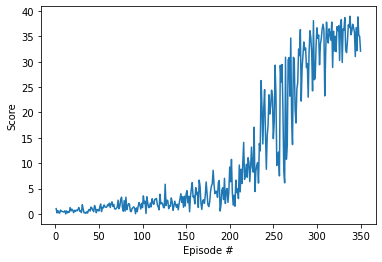

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Plot of Last 100 Episodes

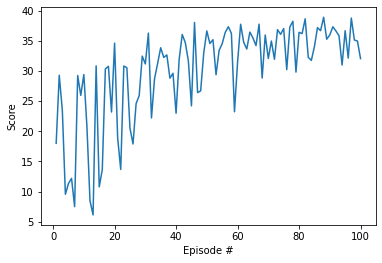

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_100)+1), scores_100)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Save Final Trained Weights

In [14]:
agent.save('final_weights.pth')